# 15 Opening Leapfrog Meshes and GoCAD TSurfaces with GemGIS

Several different modeling packages store their data in different data types. The following illustrates how to load Leapfrog meshes (.msh-files) and GoCAD TSurfaces (.ts-files) with GemGIS and convert them to a plotable PyVista format.


<img src="../images/tutorial15_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/15_opening_leapfrog_meshes_and_gocad_tsurfaces/'

## Reading Leapfrog Meshes

### Loading the Mesh Data

The Leapfrog mesh (.msh) is loaded and parsed with ``read_msh(..)``. A dictionary containing the face and vertex data will be returned.

In [18]:
import gemgis as gg
import numpy as np

data = gg.raster.read_msh(file_path + 'GM_Granodiorite.msh')

In [19]:
data.keys()

dict_keys(['Tri', 'Location'])

### Converting Mesh Data to PyVista PolyData

The loaded data will now be converted to PyVista PolyData using ``create_polydata_from_msh(..)``.

In [20]:
surf = gg.visualization.create_polydata_from_msh(data)
surf

PolyData,Information
N Cells,107358
N Points,53681
X Bounds,"1.444e+06, 1.449e+06"
Y Bounds,"5.246e+06, 5.249e+06"
Z Bounds,"-2.464e+02, 7.396e+02"
N Arrays,0


### Plotting the data

Once converted, the data can easily be plotted using PyVista.

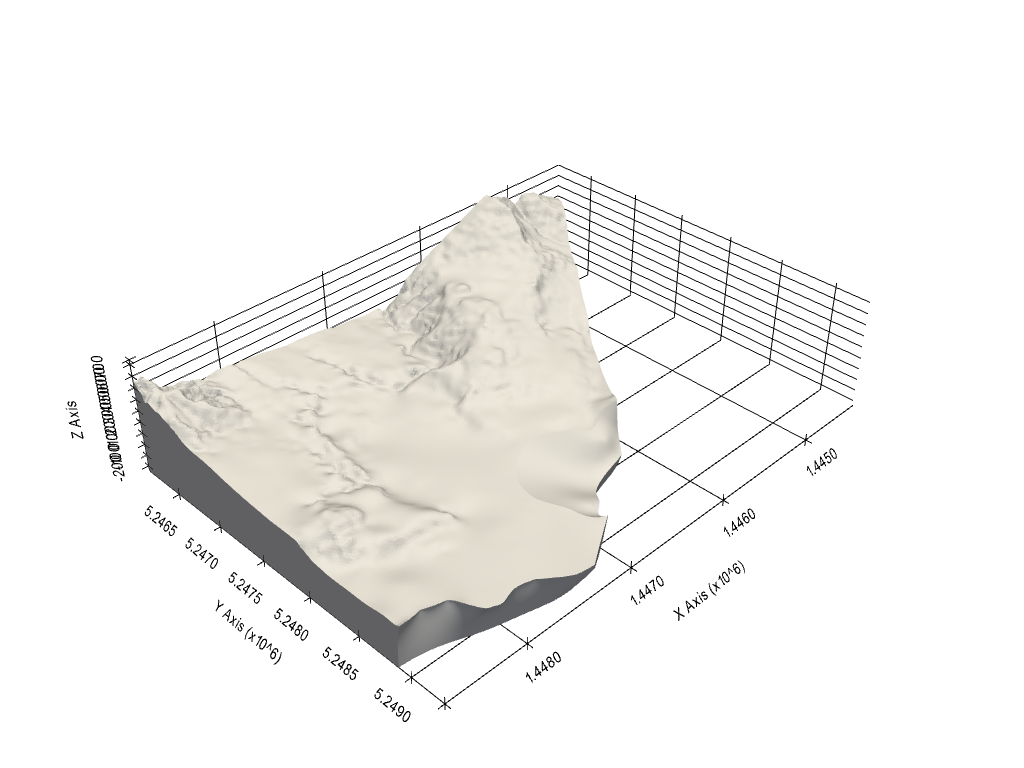

In [22]:
import pyvista as pv 

p = pv.Plotter()

p.add_mesh(surf)

p.show_grid(color='black')
p.set_background(color='white')
p.show()